# 배치 정규화(Batch Normalization)
- 배치 정규화의 잘 알려진 장점
    1. **학습 속도(training speed)**를 빠르게 할 수 있다.
         - 성능은 유지하면서 매우 적은 에포크 반복만으로도 뉴럴 네트워크가 빠르게 수렴한다. 심한 경우 10~20배 가까지 학습속도 차이가 난다.
    2. **가중치 초기화(weight initialization)에 대한 민감도를 감소시킨다.**
         - 좋은 성능으로 잘 동작하는 네트워크를 만드려면 하이퍼 파라미터 세팅을 열심히 해야하는데, BN을 쓰면 그런 세팅이 덜 정교하더라도 모델이 잘 수렴한다.
    3. 모델의 **일반화(regularization)** 효과가 있다.
    
**성능은 늘고, 학습속도는 높아진다. 또한 모델 설계에 대한 부담이 줄어들기 때문에 쓰지 않을 이유가 없다!**
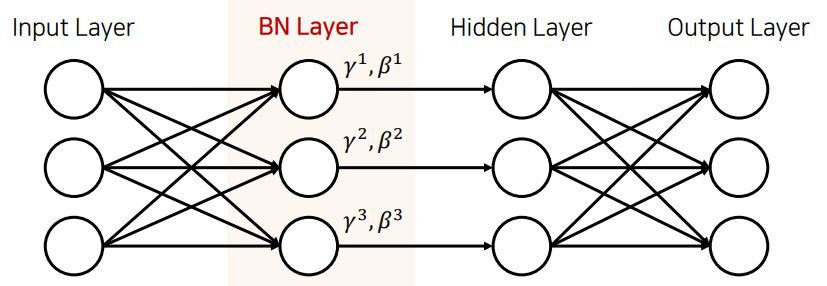

## 관련 연구 1 : 입력 정규화(Normalization)
-> 하나의 데이터가 각각의 차원, 축에 대해 비슷한 값의 범위를 가질 수 있도록 하는 것
- 입력 데이터를 정규화하여 학습 속도(training speed)를 개선할 수 있다.
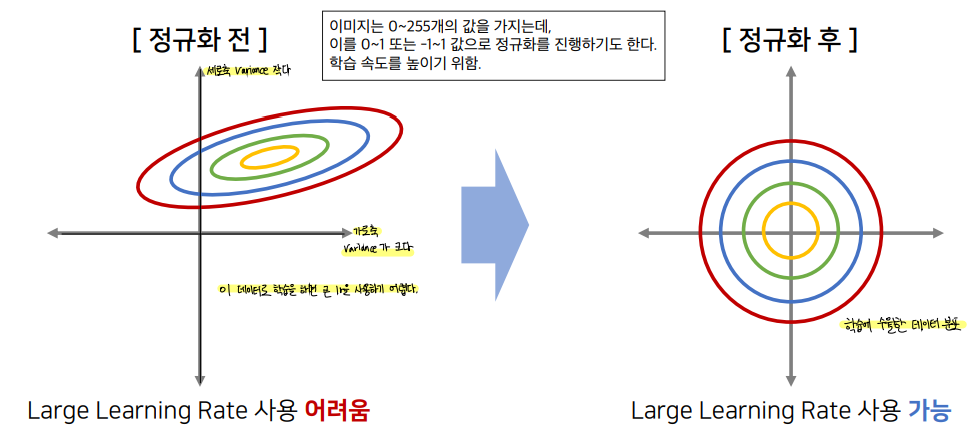

## 관련 연구 2 : 입력 표준화(Standardization)
-> 각각의 축에 대해 입력 데이터가 표준 정규분포를 따를 수 있도록 바꿔주는 것.
- 입력 데이터를 **N(0, 1)** 분포를 따르도록 **표준화**한다.
$\hat{x} = \frac{x-E[x]}{\sqrt{Var[x]}}$
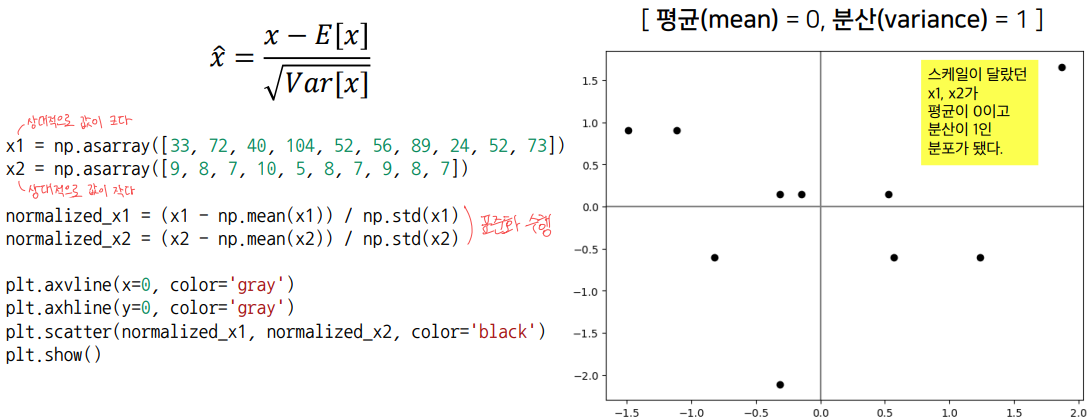

## 입력 정규화(Normalizations) vs. 화이트닝(Whitening)
1. ***입력 정규화***를 이용해 **각 차원의 데이터가 동일한 범위 내의 값을 가지도록** 만들 수 있다.
    - 모든 특성(feature)에 대하여 각각 평균만큼 빼고 특정 범위의 값을 갖도록 조절할 수 있다.
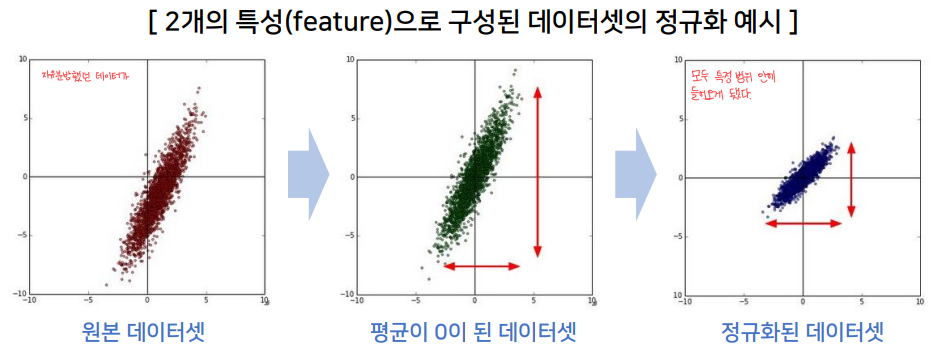

2. ***화이트닝***은 평균이 0이며 *공분산이 단위행렬*인 정규분포 형태의 데이터로 변환하는 기법.
    - *공분산이 단위행렬* : 서로 다른 특성끼리의 연관성이 없는 형태로 데이터를 전처리하는 것.
    - 일반적으로 PCA나 화이트닝보다는 *정규화*가 더 많이 사용된다.(비교적 간단하고 더 좋은 성능을 낸다.)
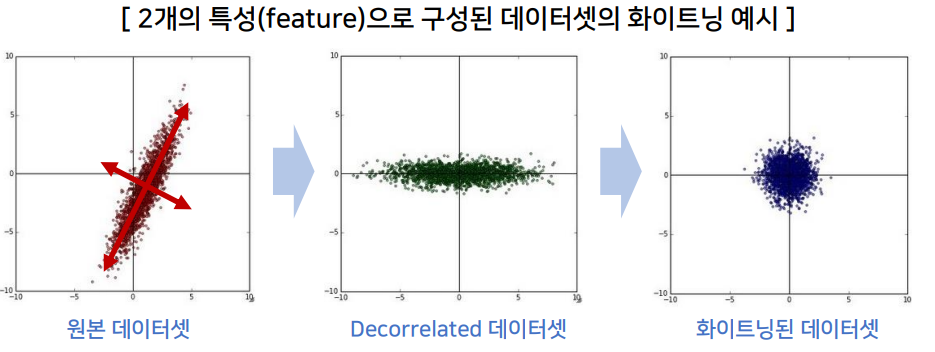

## 각 레이어에 대한 입력 분포
- 위의 방식을 통해 초기 입력 데이터를 정규화하는 것은 상대적으로 간단하다. => 일반적으로 하는 정규화(MinMax, Standard, etc...)
    - 하지만 히든 레이어의 입력은 어떻게 정규화 할 수 있을까?
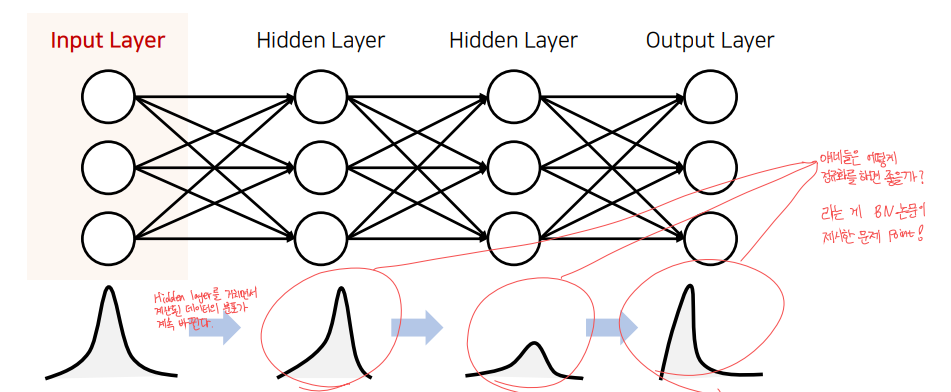

- 히든 레이어 층을 통과하기 전에 BN 층을 추가하여 아래와 같은 방법으로 모든 층의 입력 데이터 분포를 고르게 만들어준다!
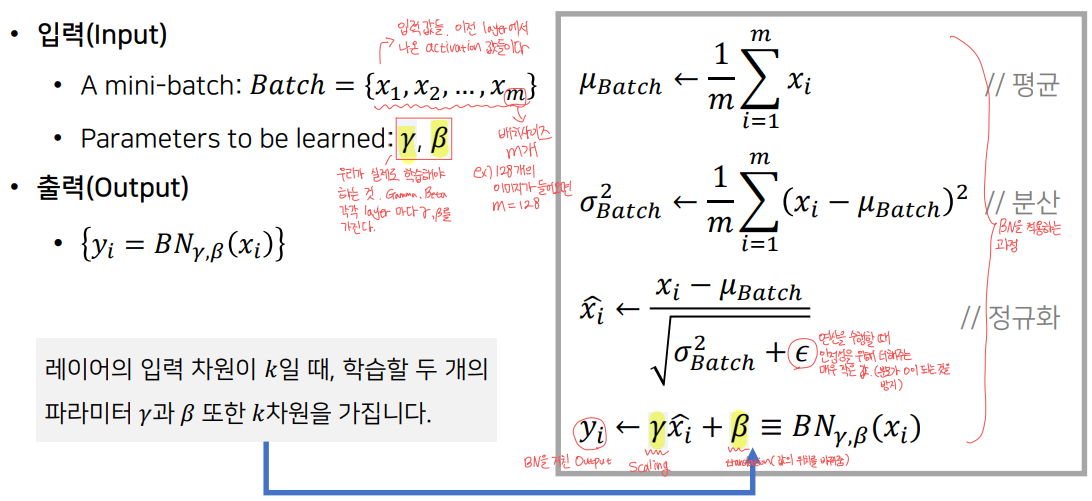

그렇다면, $\hat{x}_i$ 에서 끝내지 않고 왜 굳이 감마($\gamma$)와 베타($\beta$)를 사용하는 것일까? 그 이유는 아래와 같다.
- 각 레이어를 단순히 **N(0, 1)**로 정규화하면 **비선형(non-linear) 활성화 함수의 영향력이 감소**할 수 있다.
    - **sigmoid 함수 예시**
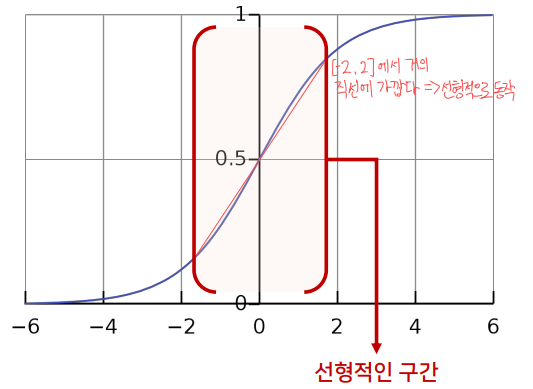

- 입력 데이터가 **N(0, 1)**로 되면 대부분의 데이터가 [-2, 2]에 위치하게 되는데, sigmoid 에서는 이 구간에서 거의 직선과 유사하기 때문에 매우 선형적으로 동작하게 된다.


- 정규화 이후에 사용하는 감마($\gamma$)와 베타($\beta$)는 **non-linearity**를 유지할 수 있도록 해준다.

- $y_i = \color{red}\gamma\hat{x_i} + \color{blue}\beta \equiv BN_{\gamma, \beta}(x_i)$ 

## 배치 정규화의 성능 향상
- 배치 정규화를 이용함으로써 얻을 수 있는 성능 향상 효과는 반박의 여지가 없다.
    - 학습을 위한 **하이퍼 파라미터 설정**으로부터 더 자유로우며, **학습이 빠르게 수행**된다.
    - 학습률을 비교적 크게 하더라도, Batch Normalization을 쓰면 성능이 훨씬 좋은 것을 확인할 수 있다.
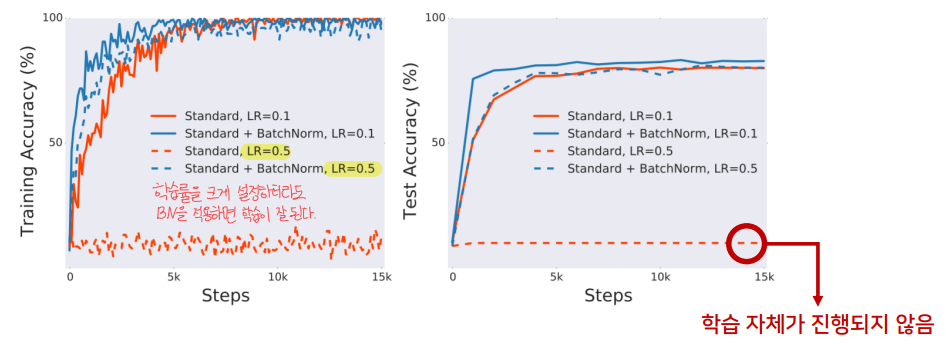

# Internal Covariate Shift(ICS)
## 공변량 변화(Covariate Shift)
- **공변량 변화(covariate shift)** : 학습 시기와는 다르게 테스트 시기에 입력 데이터의 분포가 변경되는 현상
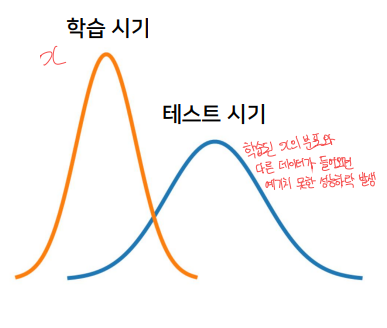

## Internal Covariate Shift(ICS) 가설
- 앞서 언급한 공변량 변화(covariate shift)가 **네트워크 내부에서 발생**하는 현상을 말한다.
    - 배치 정규화(batch normalization) *초창기 논문에서 해결하고 했던 문제*이다.
    - 입력 분포를 정규화 한 후 층을 통과할 때마다 분포가 바뀌는 현상이다.
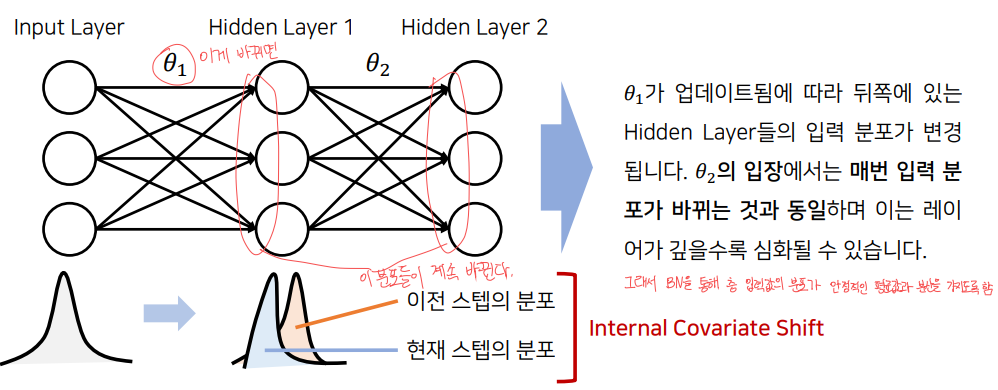

## 배치 정규화와 ICS와의 관계
- 정말 배치 정규화의 성능 향상은 ICS의 감소로부터 기인한 것일까? (과연 층의 입력 분포가 안정적이게 돼서 그런 것일까?)


- 후속 연구에 의하면 **배치 정규화의 효과와 ICS의 감소는 큰 상관이 없다**는 주장이 제기된다!
(BN이 정규화를 통해 분포를 안정적이게 하는 것에 연관이 없다!)


- `How Does Batch Normalization Help Optimization? (NIPS 2018)`은 BN이 어떻게 성능을 높혔는지에 대한 이유를 탐구한 논문이다.

### 배치 정규화의 적용
- 배치 정규화를 적용한 형태를 도식화하면 아래와 같다.
- 활성화 함수를 통과하기 전에 BN층을 먼저 통과하여 입력 분포를 안정적이게 만들어준다.
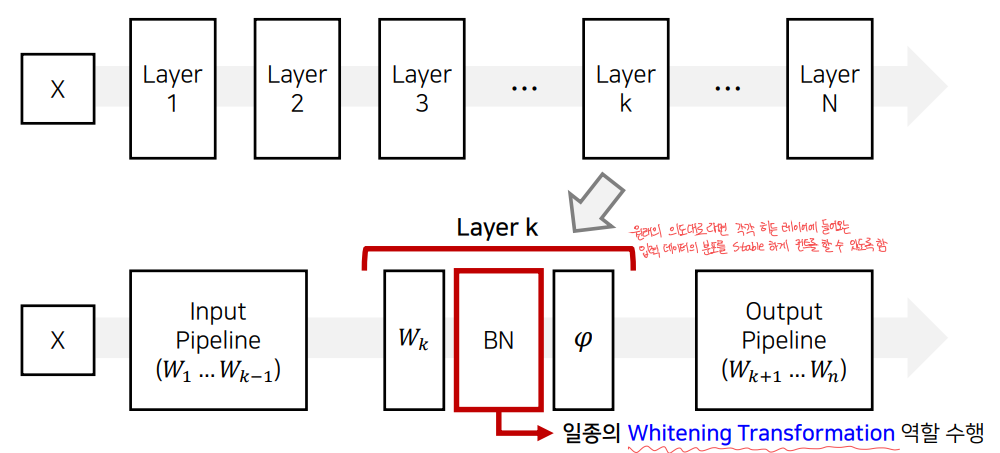

- **배치 정규화 레이어** 직후에 랜덤 노이즈를 삽입하여 ICS를 강제로 발생시켰을 때에도 여전히 일반적인 네트워크보다 성능이 우수했다.


- 오히려 BN층을 통과하니 더 불안정해 보이기도 한다.
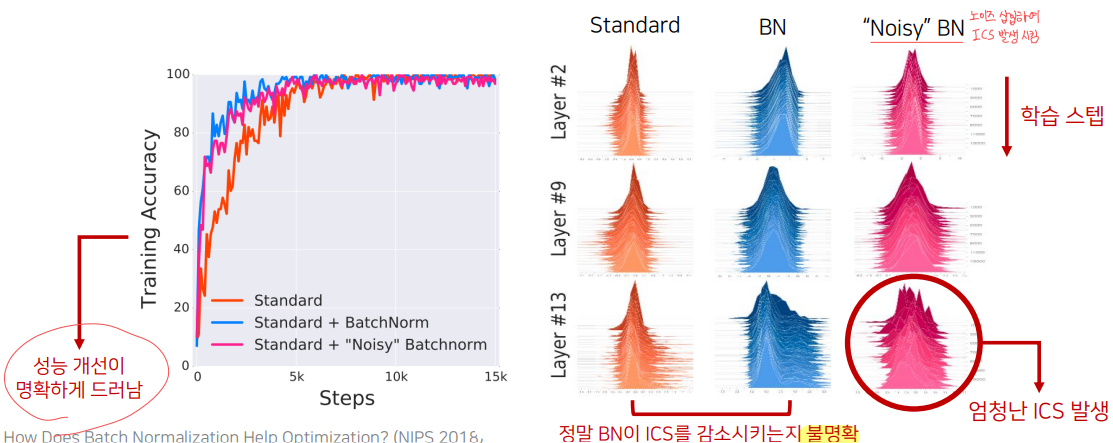

- 배치 정규화를 사용해도 **ICS는 그대로이거나 오히려 증가**하는 것을 확인할 수 있었다.
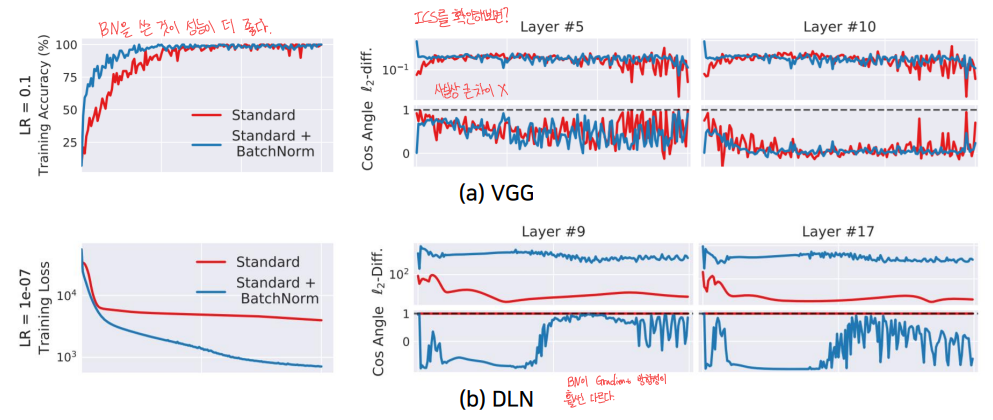

# 배치 정규화가 잘 동작하는 이유 분석
- BN이 ICS를 줄여서 성능이 좋아진 게 아니라면, 뭐 때문에 성능이 높아진 걸까!??

## 배치 정규화의 Smoothing효과
- 배치 정규화는 Optimization Landscape를 **부드럽게 만드는(Smoothing)효과**가 있다
    - 흔히 말하는 Loss Landscape는 가중치 값에 따른 Loss값을 시각화한 것을 의미한다.  
    
    - Smoothing을 이끌어낸다고 알려진 기법들 : BN, Residual Connection 등이 있다.
        - BN이 아니더라도 성능이 좋아질 수 있다!        
        
    - 자유분방한 Gradient를 일관성있고 부드럽게 만들어준다.
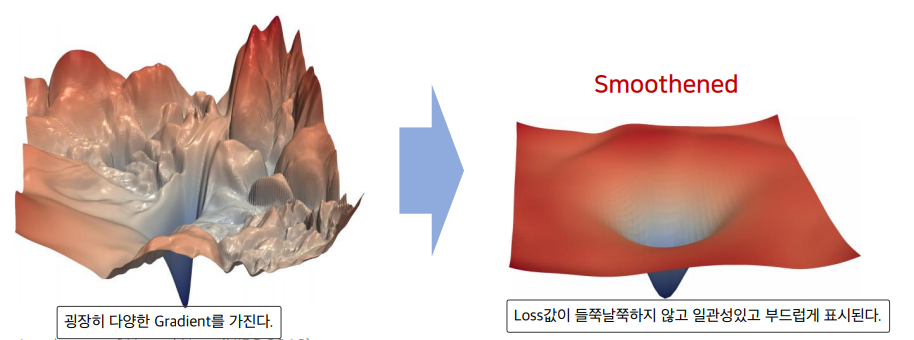

- 초기 기울기 방향에 따를 **Optimization Landscape**를 확인할 수 있다.
    - Step의 크기를 크게 키움에 따른 영향을 확인해보면 아래와 같다.
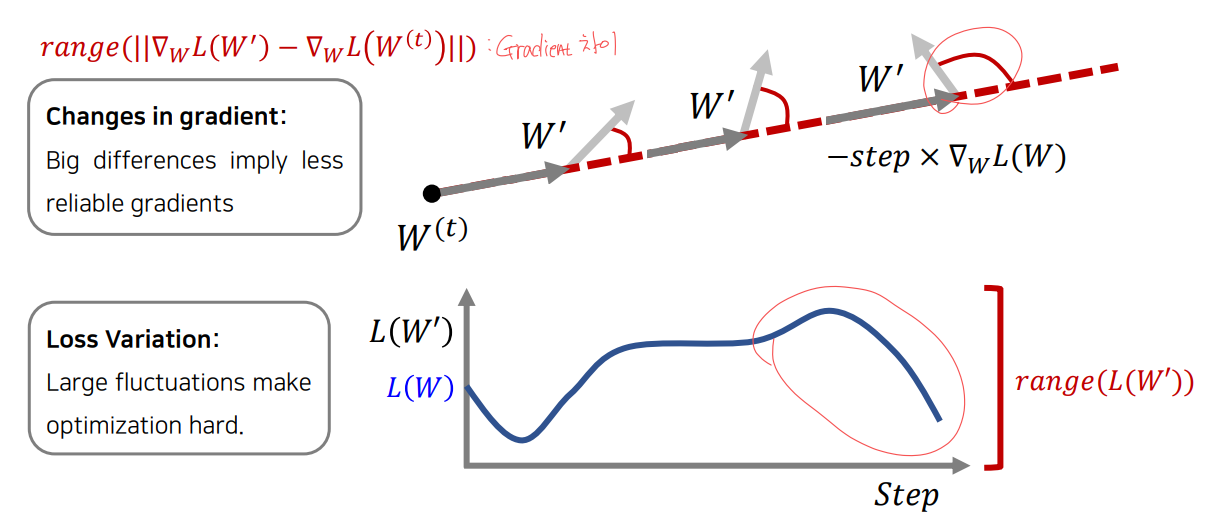

- 배치 정규화는 ICS를 해결하는 것과 큰 연관성이 없으며 그 성능 향상으 Smoothing 효과에서 기인한 것이다.
    - **기울기 예측성(Predictieness)** : 현재의 기울기 방향성을 얼마나 믿을 수 있는지
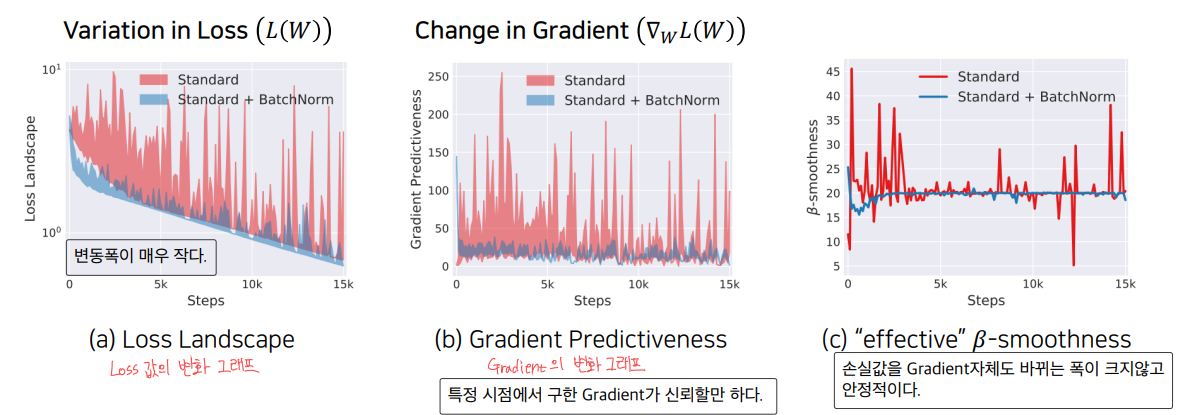

## 립시츠 연속 함수(Lipschitz-Continuous Function)
- 연속적이고 미분 가능하며 **어떠한 두 점을 잡아도 기울기가 K 이하인 함수**이다.
    - 쉽게 생각하면, 급격한 변화 없이 (K 만큼) 전반적으로 물 흐르듯이 **완만한 기울기를 가지는 함수** 형태이다.
- $K$**-Lipshitz** 함수의 정의
    - $\frac{\left|f(x1) - f(x2)\right|}{\left|x1 - x2\right|} \le K$
    - for all $x_1$ and $x_2$
    - 파라미터에 대한 비용함수가 립시츠 연속이라면 상대적으로 **안정적인 학습**을 진행할 수 있다.
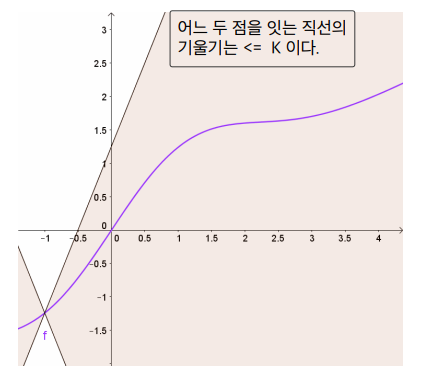

- 립시츠(Lipshitzness)가 향상된다는 것은 **현재의 기울기 방향으로 큰 스템(step)만틈 이동**을 한 뒤에도 **이동한 뒤의 기울기의 방향과 유사할 가능성이 높다**는 것을 의미한다. ( 모든 점에서의 기울기가 완만하기 때문에!)


- 배치 정규화가 아니더라고 Smoothing 효과가 있는 기법을 사용하면 성능이 향상될 수 있다.
    - 논문에서는 이를 실험적으로 / 이론적으로 증명하고 있다.
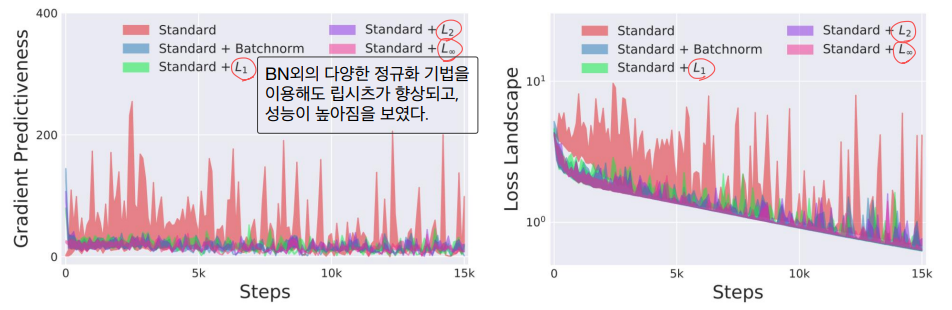

# Summary
- 배치 정규화를 사용하면 $sigmoid$ 함수나 $tanh$ 함수를 사용하더라도 기울기 소실 문제가 크게 개선된다.(**그래도 ReLU를 쓰기..!)**


- 가중치 초기화에 훨씬 덜 민감해진다.(하이퍼 파라미터를 너무 세세하게 조정하지 않아도 된다.)


- **훨씬 큰 학습률**을 사용할 수 있어서 **학습 속도를 개선**시킨다.


- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하기 때문에 테스트 데이터에 대한 **예측시에 실행 시간이 느려진다.**
    - **서비스 속도를 고려**하는 관점에서는 **배치 정규화를 꼭 사용할지 말지 고민**이 필요하다.
    
    
- 배치 정규화의 효과는 굉장하지만 내부 공변량 변화(ICS) 때문이 아니였다!
    - `How Does Batch Normalization Help Optimization? (NIPS 2018)`에서 이를 다루었고, Smoothing 효과 때문에 성능이 높아진 것이었다!

----
# Reference
1. 나동빈님 유튜브 강의 및 Github의 pdf파일
    - [배치 정규화(Batch Normalization) [꼼꼼한 딥러닝 논문 리뷰와 코드 실습]](https://www.youtube.com/watch?v=58fuWVu5DVU&list=PLRx0vPvlEmdADpce8aoBhNnDaaHQN1Typ&index=10)
    - [강의자료(PDF)](https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice/blob/master/lecture_notes/Batch_Normalization.pdf)
    
    
2. 위키독스 `PyTorch로 시작하는 딥 러닝 입문`
    - [배치정규화 설명](https://wikidocs.net/61271)
    
    
3. 논문
    - [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)
    - [How Does Batch Normalization Help Optimization?](https://arxiv.org/pdf/1805.11604.pdf)